## Before start

In [40]:
import torch
print("CUDA Available:", torch.cuda.is_available())
'''You can use prompt nvidia-smi in anaconda command prompt to check CUDA availability and GPU availability'''

CUDA Available: True


'You can use prompt nvidia-smi in anaconda command prompt to check CUDA availability and GPU availability'

## Set up the Environment

In [41]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.75  Python-3.10.15 torch-2.6.0.dev20241206+cu118 CUDA:0 (NVIDIA GeForce RTX 3070, 8192MiB)
Setup complete  (16 CPUs, 15.9 GB RAM, 492.5/931.5 GB disk)


In [42]:
# Import Libraries
import torch
import ultralytics
from ultralytics import YOLO

import cv2
from PIL import Image
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import supervision as sv

# Fix for image loading
import imageio.v2 as imageio
from imageio import imread

%matplotlib inline

In [43]:
# HOME = 'D:\\AB-BiMaGOoOD\\LOAD-IMAGE\\Y3M2\\DeepLearning'
# print(HOME)

## Play Picture

**NOTE**
*   Play picture is like you want to try a picture to test with pretained model (YOLO - V08).

>> Using the Test My Love Image: dataset\temp\Kept.png


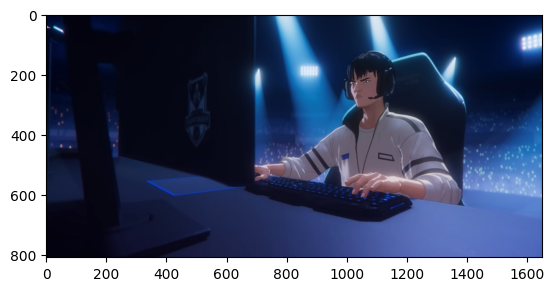

In [44]:
image_path = "dataset\\temp\\Kept.png"

print(">> Using the Test My Love Image: {}".format(image_path))
img = imageio.imread(image_path)
plt.imshow(img)

## Helping Function

In [45]:
def showResult(result):
    # Assuming 'result' is a list and you want to access the first element
    result_item = result[0]

    # Now pass the result_item to the Detections object
    detections = sv.Detections.from_ultralytics(result_item)

    box_annotator = sv.BoxAnnotator()
    label_annotator = sv.LabelAnnotator(text_color=sv.Color.BLACK)

    annotated_image = img.copy()
    annotated_image = box_annotator.annotate(annotated_image, detections=detections)
    annotated_image = label_annotator.annotate(annotated_image, detections=detections)

    # Convert image to RGB if it's in BGR format (common in OpenCV)
    img_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)

    # Plot the image
    sv.plot_image(img_rgb, size=(10, 10))

## YOLOv11 - Pretrained Model

In [46]:
# Define a YOLO model and print the model summary

# Load the model
model = YOLO('yolo11l.pt')

# Model summary
model.info()

YOLO11l summary: 631 layers, 25,372,160 parameters, 0 gradients, 87.6 GFLOPs


(631, 25372160, 0, 87.6134912)

In [47]:
from torchinfo import summary

# Get model summary (like Keras)
summary(model.model, input_size=(10, 3, 640, 640))

Layer (type:depth-idx)                                       Output Shape              Param #
DetectionModel                                               [10, 84, 8400]            --
├─Sequential: 1-1                                            --                        --
│    └─Conv: 2-1                                             [10, 64, 320, 320]        --
│    │    └─Conv2d: 3-1                                      [10, 64, 320, 320]        (1,728)
│    │    └─BatchNorm2d: 3-2                                 [10, 64, 320, 320]        (128)
│    └─Detect: 2-288                                         --                        (recursive)
│    │    └─ModuleList: 3-311                                --                        (recursive)
│    └─Conv: 2-3                                             [10, 128, 160, 160]       --
│    │    └─Conv2d: 3-4                                      [10, 128, 160, 160]       (73,728)
│    │    └─BatchNorm2d: 3-5                                 [1

In [48]:
# Count trainable and non-trainable parameters
trainable_params = sum(p.numel() for p in model.model.parameters() if p.requires_grad)
non_trainable_params = sum(p.numel() for p in model.model.parameters() if not p.requires_grad)

print(f"Trainable Parameters: {trainable_params:,}")
print(f"Non-Trainable Parameters: {non_trainable_params:,}")

Trainable Parameters: 0
Non-Trainable Parameters: 25,372,160


The reason that all parameters are not trainable, because default of YOLO model is frozen. YOLO model is frozen because YOLO want to speed up prediction for unseen data, by does not need to weight update.
<br>**Important Keyword:**
- Inference is mean the process of using a trained model to make predictions on new, unseen data.

**Example of inference with YOLO**

In [49]:
# SDK (Software Development) prompt
# Input unseen data (Inference) to pretrained model
result = model.predict(image_path)

# Show the result
plt.show(result)


image 1/1 d:\AB-BiMaGOoOD\DiddyLearning\dataset\temp\Kept.png: 320x640 1 person, 1 keyboard, 22.0ms
Speed: 1.3ms preprocess, 22.0ms inference, 1.3ms postprocess per image at shape (1, 3, 320, 640)


In [50]:
# print(result[0])

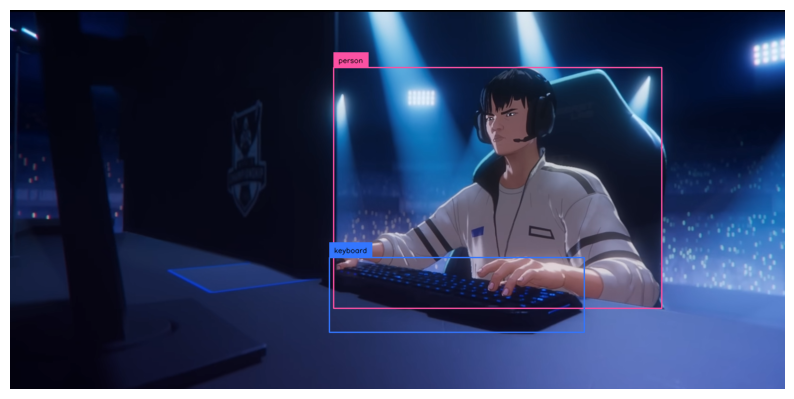

In [51]:
showResult(result)

## Fine - tune YOLO11 on custom dataset